# Problem Statement
* A dataset collected in a cosmetics shop showing details of DEFINITION customers and whether or not they responded to a special offer to buy a new lip-stick is shown in table below.
* Use this dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks in the future.
* Find the root node of decision tree.
* According to the decision tree you have made from previous training data set, what is the decision for the test data: 
 * [Age < 21, Income = Low, Gender = Female, Marital Status = Married]?

ID|Age|Income|Gender|Marital Status|Buys
--- | --- | --- | ---| --- | ---
1| <21 | High | M | Single | N
2| <21 | High | M | Married | N
3| 21-35 | High | M | Single | Y
4| >35 | Medium | M | Single | Y
5| >35 | Low | F | Single | Y
6| >35 | Low | F | Married | N
7| 21-35 | Low | F | Married | Y
8| <21 | Medium | M | Single | N
9| <21 | Low | F | Married | Y
10| >35 | Medium | F | Single | Y
11| <21 | Medium | F | Married | Y
12| 21-35 | Medium | M | Married | Y
13| 21-35 | HIgh | F | Single | Y
14| >35 | Medium | M | Married | N


### Gini Impurity Formula

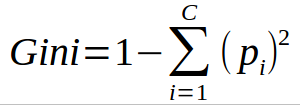

## Information Gain Formula

* p = size_of_true_rows / (l size_of_true_rows + size_of_false_rows )

* current_uncertainty = gini impurity of input rows

* Compute the weighted average of the gini impurity of the true branch and the false branch, and subtract it from the current uncertainty

## information_gain =  current_uncertainty - p * gini(true_rows) - (1 - p) * gini(false_rows)

## Decision Tree
* Full binary tree - each node contains either 2 or 0 child nodes
* Internal Nodes - Question
* Leaf Nodes - Final Prediction
* Edges - Answer to the Question


---




## CART Algorithm


---



### Algorithm: build_tree(rows)

* rows is the rows of the training_data passed to build_tree()
* find_best_split(rows) is used to determine the best question to ask
* Leaf is a class which returns final prediction
* partition(rows, question) is used to split the input rows based on the question asked
* Decision_Node is a class which contains the question, the true_branch and the false_branch

### Steps

1. information_gain, question = find_best_split(rows)
2. if information_gain := 0 then 
  1. return Leaf(rows)
3. true_rows, false_rows = partition(rows, question)
4. true_branch = build_tree(true_rows)
5. false_branch = build_tree(false_rows)
6. return Decision_Node(question, true_branch, false_branch)



---


### Algorithm: find_best_split(rows)

* best_question is used to keep a track of the question with the highest information gain.
* best_gain is the information gain of the best_question.
* current_uncertainty is the gini impurity of the input rows.
* Question is a class which contains the input_feature and one of its unique values.
* partition is the function which splits the input rows into true_rows and false_rows based on the question asked.


### Steps

1. best_question = None
2. best_gain = 0
3. for each input_feature in input_features do
  1. unique_values = Get a set of unique values in the feature
  2. for each unique_value in unique_values

    3.2.1. question = Question(input_feature, unique_value)

    3.2.2. true_rows, false_rows := partition(rows, question)

    3.2.3. If question does not split the dataset then skip it

    3.2.4. information_gain := gain(true_rows, false_rows, current_uncertainty)

    3.2.5. if information_gain > best_gain then:

         3.2.5.1 best_gain := information_gain

         3.2.5.2 best_question := question


4. return best_question, best_gain





## Source Code

In [2]:
# Friend Functions

# Find the unique values for a column in a dataset.
def unique_vals(rows, col):
    return set([row[col] for row in rows])


# Counts the number of each type of example in a dataset.
def class_counts(rows):
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

################################################################################

# A Question is used to partition a dataset.
# This class just records a 'column number' and a 'column value'.
# The 'match' method is used to compare the feature value
# in an example to the feature value stored in the question.
class Question:


    def __init__(self, column, value):
        self.column = column
        self.value = value


    # Compare the feature value in an example to the
    # feature value in this question.
    def match(self, example):
        val = example[self.column]
        return val == self.value


    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        return "is {column} == {value}".format( column=header[self.column], value=str(self.value))

# A Leaf node classifies data.
# This holds a dictionary of class (e.g., "Apple") -> number of times
# it appears in the rows from the training data that reach this leaf.
class Leaf:

    def __init__(self, rows):
        self.predictions = class_counts(rows)

# A Decision Node asks a question.
# This holds a reference to the question, and to the two child nodes.
class Decision_Node:

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch


################################################################################

class Decision_Tree:


    # Partitions a dataset.
    # For each row in the dataset, check if it matches the question.
    # If so, add it to 'true rows', otherwise, add it to 'false rows'.
    def partition(self,rows, question):
        true_rows, false_rows = [], []
        for row in rows:
            if question.match(row):
                true_rows.append(row)
            else:
                false_rows.append(row)
        return true_rows, false_rows


    # Calculate the Gini Impurity for a list of rows.
    def gini(self,rows):
        counts = class_counts(rows)
        impurity = 1
        for lbl in counts:
            prob_of_lbl = counts[lbl] / float(len(rows))
            impurity -= prob_of_lbl**2
        return impurity


    # Information Gain. - The uncertainty of the starting node, minus the weighted impurity of two child nodes.
    def info_gain(self,left, right, current_uncertainty):
        p = float(len(left)) / (len(left) + len(right))
        return current_uncertainty - p * self.gini(left) - (1 - p) * self.gini(right)


    # Find the best question to ask by iterating over every feature / value
    # and calculating the information gain.
    def find_best_split(self,rows):
        best_gain = 0  # keep track of the best information gain
        best_question = None  # keep train of the feature / value that produced it
        current_uncertainty = self.gini(rows)
        n_features = len(rows[0]) - 1  # number of columns

        # For each feature
        for col in range(n_features):

            # unique values in the column
            values = set([row[col] for row in rows])

            # for each value
            for val in values:

                # Ask Question
                question = Question(col, val)

                # Split the dataset
                true_rows, false_rows = self.partition(rows, question)

                # Skip this split if it doesn't divide the dataset.
                if len(true_rows) == 0 or len(false_rows) == 0:
                    continue

                # Calculate the information gain from this split
                gain = self.info_gain(true_rows, false_rows, current_uncertainty)

                # Record the best gain and the best question
                if gain >= best_gain:
                    best_gain, best_question = gain, question

        # Return Question with the highest information gain
        return best_gain, best_question


    # Builds the tree.
    # Rules of recursion:
    #   1) Assume that it works.
    #   2) Start by checking for the base case (no further information gain).
    #   3) Prepare for giant stack traces.
    def build_tree(self,rows):

        # Try partitioing the dataset on each of the unique attribute,
        # calculate the information gain,
        # and return the question that produces the highest gain.
        gain, question = self.find_best_split(rows)

        # Base case: no further info gain
        # Since we can ask no further questions,
        # we'll return a leaf.
        if gain == 0:
            return Leaf(rows)

        # If we reach here, we have found a useful feature / value
        # to partition on.
        true_rows, false_rows = self.partition(rows, question)

        # Recursively build the true branch.
        true_branch = self.build_tree(true_rows)

        # Recursively build the false branch.
        false_branch = self.build_tree(false_rows)

        # Return a Question node.
        # This records the best feature / value to ask at this point,
        # as well as the branches to follow
        # dependingo on the answer.
        return Decision_Node(question, true_branch, false_branch)


    def print_tree(self,node, spacing=""):

        # Base case: we've reached a leaf
        if isinstance(node, Leaf):
            print (spacing + "Predict", node.predictions)
            return

        # Print the question at this node
        print (spacing + str(node.question))

        # Call this function recursively on the true branch
        print (spacing + '--> True:')
        self.print_tree(node.true_branch, spacing + "  ")

        # Call this function recursively on the false branch
        print (spacing + '--> False:')
        self.print_tree(node.false_branch, spacing + "  ")


    # Rules of recursion:
    #   1) Assume that it works.
    #   2) Start by checking for the base case (no further information gain).
    #   3) Prepare for giant stack traces.
    def classify(self,row, node):

        # Base case: we've reached a leaf
        if isinstance(node, Leaf):
            return node.predictions

        # Decide whether to follow the true-branch or the false-branch.
        # Compare the feature / value stored in the node,
        # to the example we're considering.
        if node.question.match(row):
            return self.classify(row, node.true_branch)
        else:
            return self.classify(row, node.false_branch)


    def print_leaf(self,counts):
        total = sum(counts.values()) * 1.0
        probs = {}
        for lbl in counts.keys():
            probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
        return probs
    
    def set_root(self,node):
      self.root = node
    
    def get_root(self):
      return self.root

################################################################################
class PCAG:


  def __init__(self,training_data,testing_data,header):
    training_data = self.data_validation(training_data,header)
    DTC = self.training(training_data)
    self.prediction(DTC, testing_data)


  def data_validation(self,training_data,header):

    print('\nData Validation\n================')
    
    print('# Raw Train Data = {length}'.format(length=len(training_data)))
    training_data_cleaned = []
    for record in training_data:
      age, income, gender, marital_status, buys = record
      if age not in ['<21','21-35','>35']:
        pass
      if income not in ['Low','Medium','High']:
        pass
      if gender not in ['M','F']:
        pass
      if marital_status not in ['Single','Maried']:
        pass
      if buys not in ['N','Y']:
        pass
      training_data_cleaned.append(
          [age, income, gender, marital_status, buys]
      )
    print('# Cleaned Train Data = {length}'.format(length=len(training_data_cleaned)))

    return training_data_cleaned


  def training(self,training_data):
    print('\nTraining\n================')
    DTC = Decision_Tree()
    decision_tree = DTC.build_tree(training_data)
    DTC.set_root(decision_tree)
    print('Final Tree')
    DTC.print_tree(DTC.get_root())
    return DTC


  def prediction(self,DTC,testing_data):
    print('\nPrediction\n================')
    print('Prediction')
    for row in testing_data:
      print("Record: {record}".format(record=row))
      print("Predicted: {predicted}".format(predicted=DTC.print_leaf(DTC.classify(row, DTC.get_root()))))
    pass

################################################################################

training_data = [
  ['<21', 'High', 'M', 'Single', 'N'],
  ['<21', 'High', 'M', 'Married', 'N'],
  ['21-35', 'High', 'M', 'Single', 'Y'],
  ['>35', 'Medium', 'M', 'Single', 'Y'],
  ['>35', 'Low', 'F', 'Single', 'Y'],
  ['>35', 'Low', 'F', 'Married', 'N'],
  ['21-35', 'Low', 'F', 'Married', 'Y'],
  ['<21', 'Medium', 'M', 'Single', 'N'],
  ['<21', 'Low', 'F', 'Married', 'Y'],
  ['>35', 'Medium', 'F', 'Single', 'Y'],
  ['<21', 'Medium', 'F', 'Married', 'Y'],
  ['21-35', 'Medium', 'M', 'Married', 'Y'],
  ['21-35', 'High', 'F', 'Single', 'Y'],
  ['>35', 'Medium', 'M', 'Married', 'N']
]
testing_data = [
  ['<21', 'Low', 'F', 'Married']
]
header = ["Age", "Income","Gender","Marital Status","Buys"]
pcag = PCAG(training_data,testing_data,header)


Data Validation
# Raw Train Data = 14
# Cleaned Train Data = 14

Training
Final Tree
is Age == 21-35
--> True:
  Predict {'Y': 4}
--> False:
  is Gender == F
  --> True:
    is Marital Status == Married
    --> True:
      is Age == >35
      --> True:
        Predict {'N': 1}
      --> False:
        Predict {'Y': 2}
    --> False:
      Predict {'Y': 2}
  --> False:
    is Age == >35
    --> True:
      is Marital Status == Married
      --> True:
        Predict {'N': 1}
      --> False:
        Predict {'Y': 1}
    --> False:
      Predict {'N': 3}

Prediction
Prediction
Record: ['<21', 'Low', 'F', 'Married']
Predicted: {'Y': '100%'}
